# Introduction

In [ ]:
%pip install pandas

In [6]:
import pandas as pd
df=pd.read_csv('dataset/diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


creating feature matrix and target array

In [8]:
X=df.drop('Glucose',axis=1).values
y=df['Glucose'].values
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


making prediction from a single feature

In [23]:
X_bmi = X[:,4]
print(X_bmi[:5])
print(y.shape,X_bmi.shape)

[33.6 26.6 23.3 28.1 43.1]
(768,) (768,)


In [16]:
# we see are 1D array, which fine for y but for X (features) we need to make it 2D to be accepted by scikit-learn
X_bmi=X_bmi.reshape(-1,1)
print(X_bmi.shape)

(768, 1)


## plotting gloucose vs bmi

In [ ]:
%pip install matplotlib

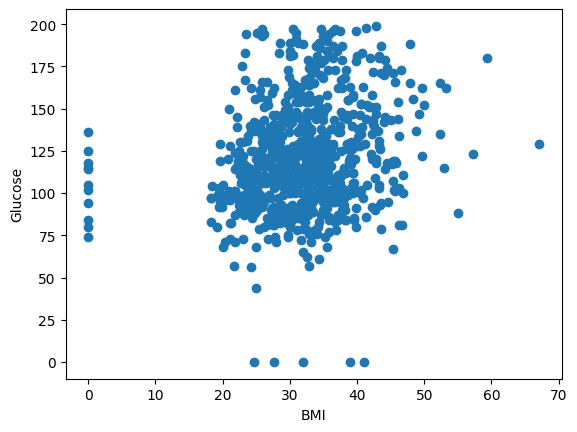

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi,y)
plt.ylabel('Glucose')
plt.xlabel('BMI')
plt.show()

observation : as BMI increases, glucose levels also increase

## fitting a linear regression model

[122.33559947 116.06003628 113.10155649 117.40479982 130.85243523]


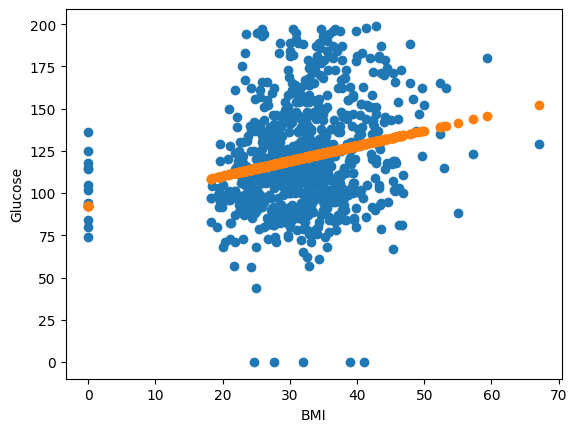

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi,y)
prediction = reg.predict(X_bmi)
print(prediction[:5])
plt.scatter(X_bmi,y)
plt.scatter(X_bmi,prediction)
plt.ylabel('Glucose')
plt.xlabel('BMI')
plt.show()

# which is a weak to moderate positive correlation

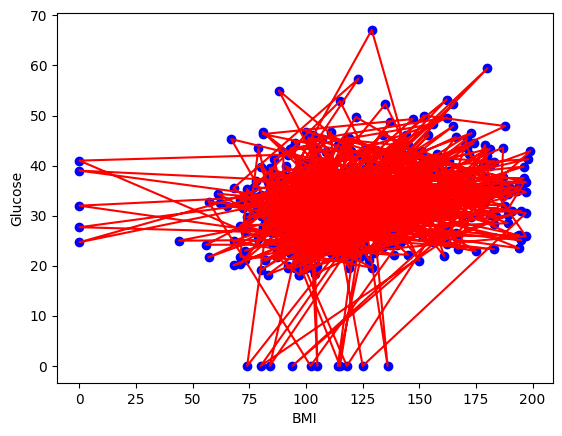

In [26]:
# Create scatter plot
plt.scatter(y, X_bmi, color="blue")

# Create line plot
plt.plot(y, X_bmi, color="red")
plt.xlabel("BMI")
plt.ylabel("Glucose")

# Display the plot
plt.show()

## fit and predict regression

In [29]:
from sklearn.model_selection import train_test_split
# Create X and y arrays
X = df.drop("BMI", axis=1).values  # Features
y = df["Glucose"].values  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Display the first few predictions alongside actual values
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))


Predictions: [ 98. 112.], Actual Values: [ 98 112]


In [32]:
# note mean_squared_error depreciated
from sklearn.metrics import root_mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = root_mean_squared_error(y_test, y_pred)
# rmse2 = root_mean_squared_error(y_test, y_pred, squared=True)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))
# print("RMSE_true: {}".format(rmse2))

R^2: 1.0
RMSE: 2.1757722829082446e-14


In [34]:
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X_train, y_train, cv=kf)

# Print scores
print(cv_scores)


[1. 1. 1. 1. 1. 1.]


## Ridge Regression (Regularization)

In [35]:
from sklearn.linear_model import Ridge

alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the model on the training data
  ridge.fit(X_train, y_train)
  
  # Evaluate on the test data
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)

print(ridge_scores)


[0.9999999999999442, 0.9999999999944353, 0.9999999994636629, 0.9999999534801057, 0.9999956606388652, 0.999592538473332]


[0.00000000e+00 9.99698618e-01 0.00000000e+00 0.00000000e+00
 5.08817064e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00]


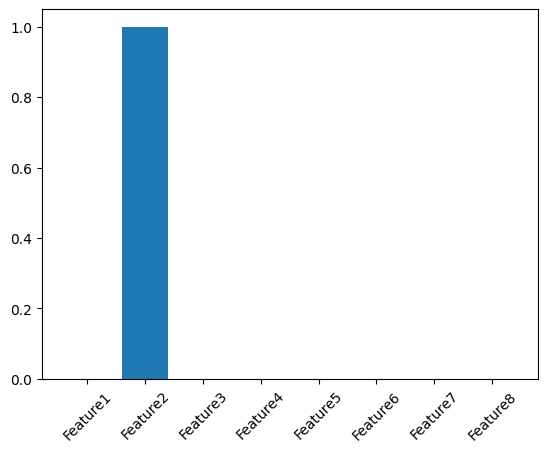

In [39]:
sales_columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8']

from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()
